# Data Preparation (and API requests)

## Duplicate Resolving

In [4]:
from PIL import Image
import imagehash
import os

bees = ["Bombus barbutellus", "Bombus bohemicus", "Bombus campestris", "Bombus cryptarum", "Bombus distinguendus", "Bombus hortorum", "Bombus humilis", "Bombus hypnorum", "Bombus jonellus", "Bombus lapidarius", "Bombus lucorum", "Bombus magnus", "Bombus monticola", "Bombus muscorum", "Bombus pascuorum", "Bombus pratorum", "Bombus ruderarius", "Bombus ruderatus", "Bombus rupestris", "Bombus soroeensis", "Bombus sylvarum", "Bombus sylvestris", "Bombus terrestris", "Bombus vestalis"]

for bee in bees:
    folder_path = "E:/Bees/Bee_Data_UK_Uncropped/" + bee + "/"
    images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    duplicates = []
    hash_keys = dict()
    for index, image in enumerate(images):
        filehash = imagehash.average_hash(Image.open(folder_path + image))
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))
    print(bee + " duplicates found: " + str(len(duplicates)))
    for file_indexes in duplicates:
        delete_path = folder_path + images[file_indexes[0]]
        os.remove(delete_path)

Bombus barbutellus duplicates found: 0
Bombus bohemicus duplicates found: 0
Bombus campestris duplicates found: 0
Bombus cryptarum duplicates found: 0
Bombus distinguendus duplicates found: 0
Bombus hortorum duplicates found: 0
Bombus humilis duplicates found: 0
Bombus hypnorum duplicates found: 0
Bombus jonellus duplicates found: 0
Bombus lapidarius duplicates found: 0
Bombus lucorum duplicates found: 0
Bombus magnus duplicates found: 0
Bombus monticola duplicates found: 0
Bombus muscorum duplicates found: 0
Bombus pascuorum duplicates found: 202
Bombus pratorum duplicates found: 83
Bombus ruderarius duplicates found: 0
Bombus ruderatus duplicates found: 7
Bombus rupestris duplicates found: 9
Bombus soroeensis duplicates found: 1
Bombus sylvarum duplicates found: 2
Bombus sylvestris duplicates found: 4
Bombus terrestris duplicates found: 190
Bombus vestalis duplicates found: 21


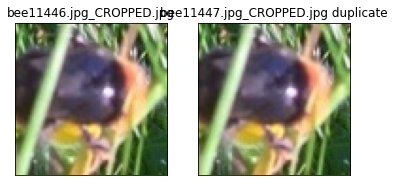

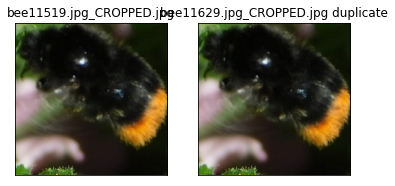

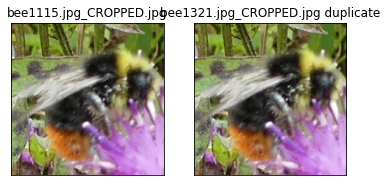

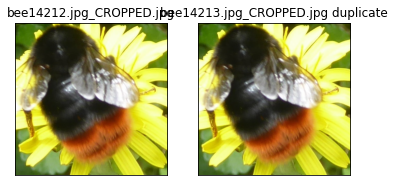

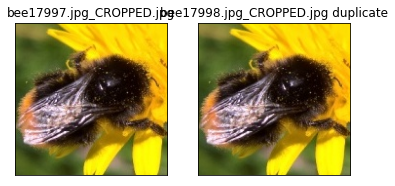

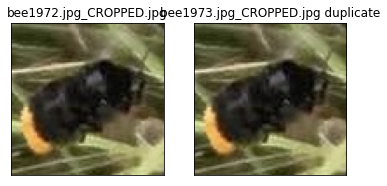

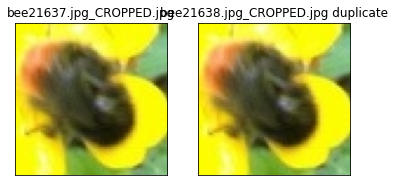

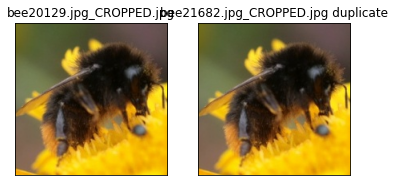

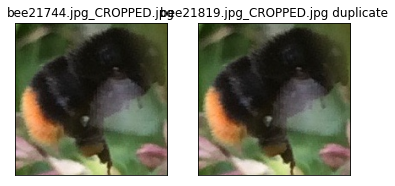

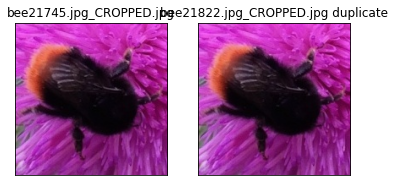

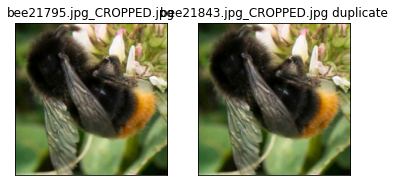

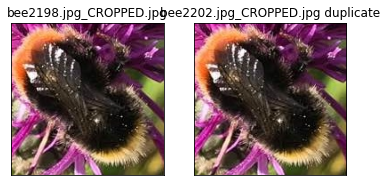

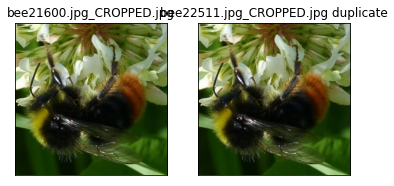

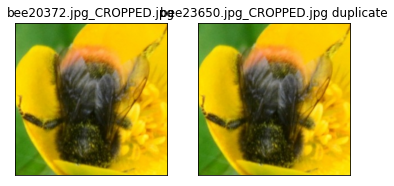

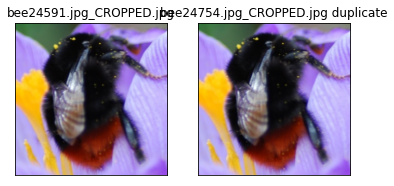

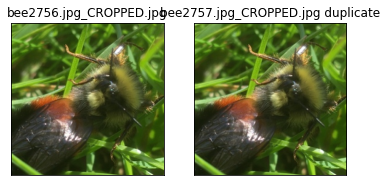

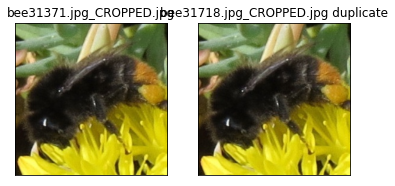

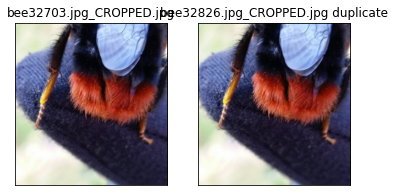

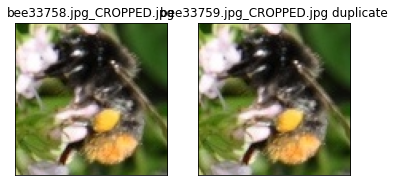

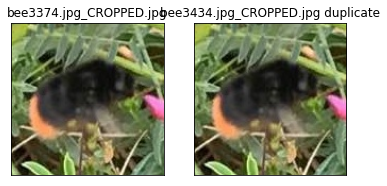

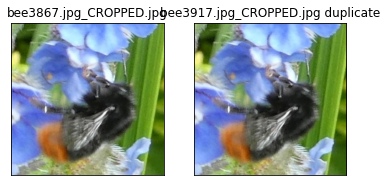

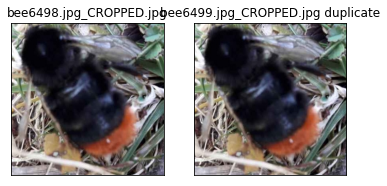

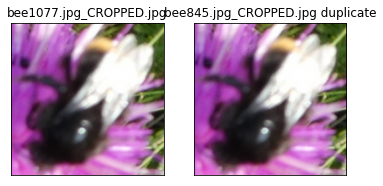

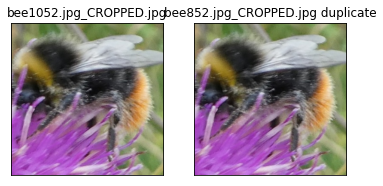

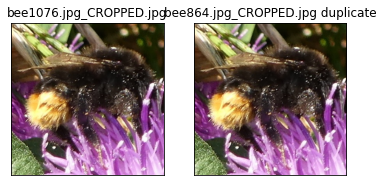

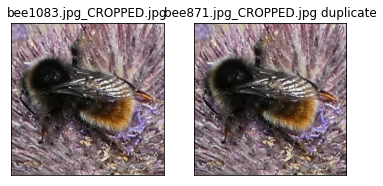

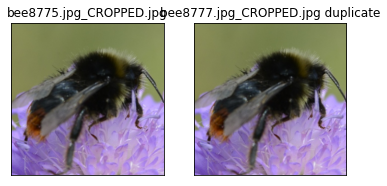

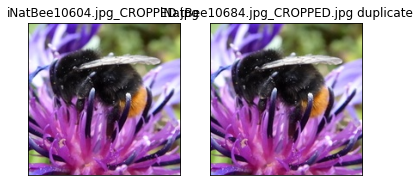

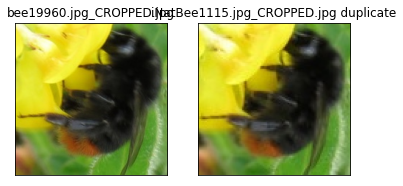

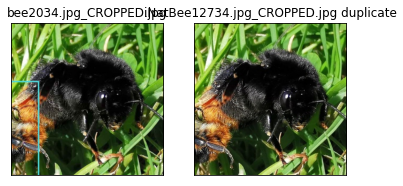

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

for file_indexes in duplicates[:30]:
    try:
        image1 = folder_path + images[file_indexes[1]]
        image2 = folder_path + images[file_indexes[0]]
    
        plt.subplot(121),plt.imshow(plt.imread(image1, format='jpg'))
        plt.title(str(images[file_indexes[1]]).strip('.')), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(plt.imread(image2, format='jpg'))
        plt.title(str(images[file_indexes[0]]).strip('.') + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

## Train, Test and Validation Split

## Video Splitting

In [1]:
import cv2, os

def getFrame(sec):
        vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
        hasFrames,image = vidcap.read()
        if hasFrames:
            if not os.path.exists(folder_path):
                    os.makedirs(folder_path)
            cv2.imwrite((folder_path+"/image"+str(count)+".jpg"), image)     # save frame as JPG file
        return hasFrames

for filename in os.listdir('D:/Jen/Documents/Dissertation/Video_Raw/'):
    file_path = 'D:/Jen/Documents/Dissertation/Video_Raw/' + filename
    folder_path = 'D:/Jen/Documents/Dissertation/Video_Split/' + filename.split('.')[0]
    print(folder_path)
    vidcap = cv2.VideoCapture(file_path)
    sec = 0
    frameRate = 1 #it will capture image in each 2 seconds
    count=1
    success = getFrame(sec)
    while success:
        count = count + 1
        sec = sec + frameRate
        sec = round(sec, 2)
        success = getFrame(sec)

D:/Jen/Documents/Dissertation/Video_Split/VID_20200517_122441097
D:/Jen/Documents/Dissertation/Video_Split/VID_20200517_123751488
D:/Jen/Documents/Dissertation/Video_Split/VID_20200517_124341919
D:/Jen/Documents/Dissertation/Video_Split/VID_20200517_124732941
D:/Jen/Documents/Dissertation/Video_Split/VID_20200517_124834228
D:/Jen/Documents/Dissertation/Video_Split/VID_20200517_125948874
D:/Jen/Documents/Dissertation/Video_Split/VID_20200517_131508862
D:/Jen/Documents/Dissertation/Video_Split/VID_20200517_131720597
D:/Jen/Documents/Dissertation/Video_Split/VID_20200624_104616059
D:/Jen/Documents/Dissertation/Video_Split/VID_20200624_110029214
D:/Jen/Documents/Dissertation/Video_Split/VID_20200624_111151071
D:/Jen/Documents/Dissertation/Video_Split/VID_20200625_181034596
D:/Jen/Documents/Dissertation/Video_Split/VID_20200625_181521371
D:/Jen/Documents/Dissertation/Video_Split/VID_20200625_181635410
D:/Jen/Documents/Dissertation/Video_Split/VID_20200625_181717786
D:/Jen/Documents/Disserta

## Train/Test/Validation Splitting the Dataset

In [5]:
from PIL import Image
import shutil, os

bees = ["Bombus bohemicus", "Bombus campestris", "Bombus cryptarum", "Bombus hortorum", "Bombus humilis", "Bombus hypnorum", "Bombus jonellus", "Bombus lapidarius", "Bombus lucorum", "Bombus monticola", "Bombus muscorum", "Bombus pascuorum", "Bombus pratorum", "Bombus ruderatus", "Bombus rupestris", "Bombus soroeensis", "Bombus sylvarum", "Bombus sylvestris", "Bombus terrestris", "Bombus vestalis"]

for bee in bees:
    folder_path = "E:/Bees/Bee_Data_UK/Weights3/" + bee + "/"
    new_folder_path = "D:/Jen/Documents/Dissertation/Bee_Data_UK/Weights3/"
    images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    total = len(images)
    mode = 1
    for image in images:
        if mode <= 6: 
            new_path = new_folder_path + "Train/" + bee + "/"
            if not os.path.exists(new_path):
                os.makedirs(new_path)
            mode+=1
        elif mode <=8:
            new_path = new_folder_path + "Test/" + bee + "/"
            if not os.path.exists(new_path):
                os.makedirs(new_path)
            mode+=1
        else:
            new_path = new_folder_path + "Validation/" + bee + "/"
            if not os.path.exists(new_path):
                os.makedirs(new_path)
            mode+=1
            if mode == 11:
                mode = 1

        old_image_path = os.path.join(folder_path, image)
        new_image_path = os.path.join(new_path, image)
        imageObject = Image.open(folder_path + image)
        width, height = imageObject.size
        if height == width and height > 50:
            shutil.copy(old_image_path, new_image_path)

## API Requests

In [1]:
import requests
response = requests.post('http://54.171.168.100/api/image', files=\
        {'image1': ('CNN_example.jpg', open('D:/Jen/Documents/Dissertation/Presentation/CNN_example.jpg','rb'))})#, 'image2': ('bee125.jpg_CROPPED.jpg', open('D:/Jen/Documents/Dissertation/Bee_Data_UK/Weights3/Test/Bombus terrestris/bee125.jpg_CROPPED.jpg','rb'))})
if response.status_code == 200:
    print("Success: {}".format(response.text))
else: print("Failure: {}".format(response.text))

Success: {"pred":[["Bombus hortorum",0.7327595353126526],["Bombus lucorum",0.1498279571533203],["Bombus vestalis",0.039936866611242294],["Bombus pratorum",0.025757048279047012],["Bombus terrestris",0.019070807844400406],["Bombus jonellus",0.015009274706244469],["Bombus sylvestris",0.007752054836601019],["Bombus ruderatus",0.007409778889268637],["Bombus soroeensis",0.0014193395618349314],["Bombus lapidarius",0.0005648737424053252],["Bombus sylvarum",0.00027679724735207856],["Bombus hypnorum",9.498142753727734e-05],["Bombus monticola",4.6094966819509864e-05],["Bombus pascuorum",4.415319926920347e-05],["Bombus bohemicus",9.895054972730577e-06],["Bombus campestris",7.776856364216655e-06],["Bombus humilis",7.141755304473918e-06],["Bombus muscorum",4.6766076593485195e-06],["Bombus rupestris",9.979164588003187e-07]]}

